In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
#drive.mount('/content/drive')

In [ ]:
df= pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','BMI']] = df[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.shape

(768, 9)

<Axes: >

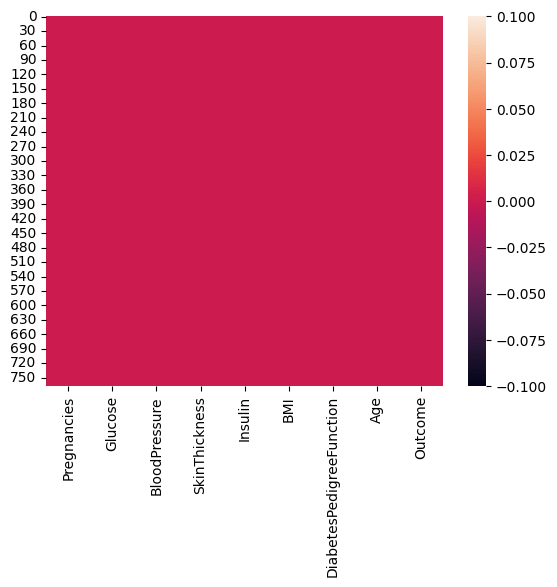

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,79.799479,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,115.244002,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

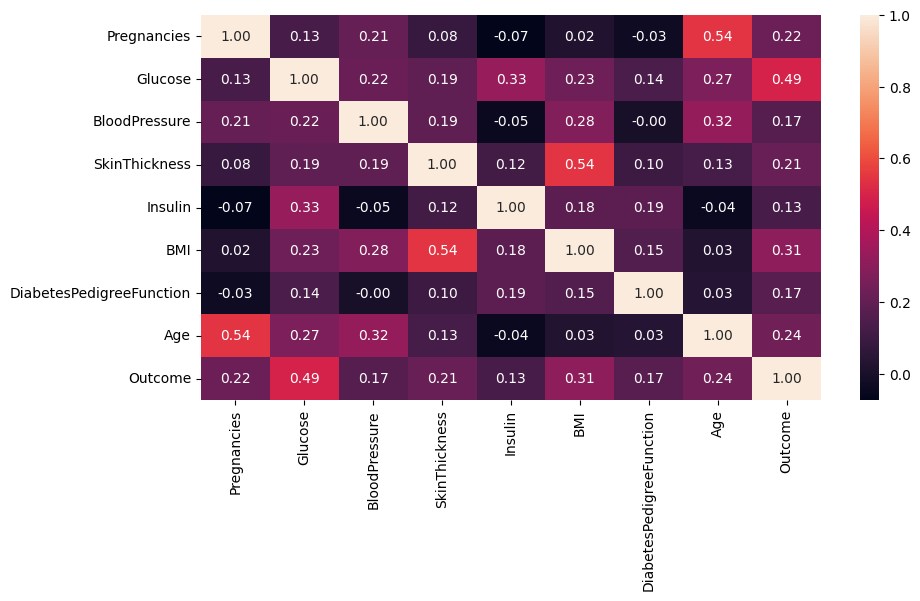

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

<Axes: >

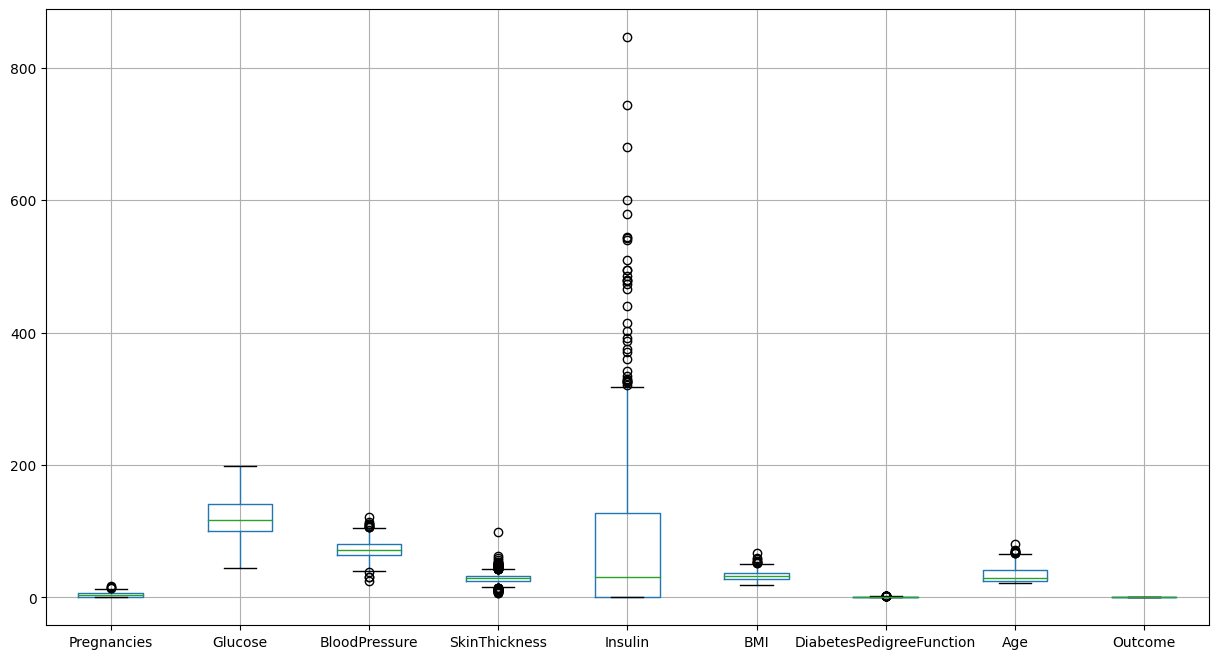

In [ ]:
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'],figsize=(15,8))

In [ ]:
IQR=df['Pregnancies'].quantile(0.75)-df['Pregnancies'].quantile(0.25)
upperbound=df['Pregnancies'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Pregnancies'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

13.5 -6.5


In [ ]:
df.loc[df['Pregnancies']>13.5,'Pregnancies']=13.5
df.loc[df['Pregnancies']<-6.5,'Pregnancies']=0

In [ ]:
#df.boxplot(column=['Pregnancies'])

In [ ]:
IQR=df['Glucose'].quantile(0.75)-df['Glucose'].quantile(0.25)
upperbound=df['Glucose'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Glucose'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

201.0 39.0


In [ ]:
df.loc[df['Glucose']>201,'Glucose']=201
df.loc[df['Glucose']<39,'Glucose']=39

In [ ]:
#df.boxplot(column=['Glucose'])

In [ ]:
IQR=df['BloodPressure'].quantile(0.75)-df['BloodPressure'].quantile(0.25)
upperbound=df['BloodPressure'].quantile(0.75)+1.5*(IQR)
lowerbound=df['BloodPressure'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

104.0 40.0


In [ ]:
df.loc[df['BloodPressure']>104,'BloodPressure']=104
df.loc[df['BloodPressure']<40,'BloodPressure']=40

In [ ]:
#df.boxplot(column=['BloodPressure'])

In [ ]:
IQR=df['SkinThickness'].quantile(0.75)-df['SkinThickness'].quantile(0.25)
upperbound=df['SkinThickness'].quantile(0.75)+1.5*(IQR)
lowerbound=df['SkinThickness'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

42.5 14.5


In [ ]:
df.loc[df['SkinThickness']>42.5,'SkinThickness']=42.5
df.loc[df['SkinThickness']<14.5,'SkinThickness']=14.5

In [ ]:
#df.boxplot(column=['SkinThickness'])

In [ ]:
IQR=df['Insulin'].quantile(0.75)-df['Insulin'].quantile(0.25)
upperbound=df['Insulin'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Insulin'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

318.125 -190.875


In [ ]:
df.loc[df['Insulin']>206.62,'Insulin']=206.62
df.loc[df['Insulin']<70.43,'Insulin']=70.43

In [ ]:
#df.boxplot(column=['Insulin'])

In [ ]:
IQR=df['BMI'].quantile(0.75)-df['BMI'].quantile(0.25)
upperbound=df['BMI'].quantile(0.75)+1.5*(IQR)
lowerbound=df['BMI'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

50.25 13.849999999999998


In [ ]:
df.loc[df['BMI']>50.25,'BMI']=50.25
df.loc[df['BMI']<13.85,'BMI']=13.85

In [ ]:
#df.boxplot(column=['BMI'])

In [ ]:
IQR=df['DiabetesPedigreeFunction'].quantile(0.75)-df['DiabetesPedigreeFunction'].quantile(0.25)
upperbound=df['DiabetesPedigreeFunction'].quantile(0.75)+1.5*(IQR)
lowerbound=df['DiabetesPedigreeFunction'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

1.2 -0.32999999999999996


In [ ]:
df.loc[df['DiabetesPedigreeFunction']>1.2,'DiabetesPedigreeFunction']=1.2
df.loc[df['DiabetesPedigreeFunction']<-0.3339,'DiabetesPedigreeFunction']=0

In [ ]:
#df.boxplot(column=['DiabetesPedigreeFunction'])

In [ ]:
IQR=df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
upperbound=df['Age'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Age'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

66.5 -1.5


In [ ]:
df.loc[df['Age']>66.5,'Age']=66.5
df.loc[df['Age']<-1.5,'Age']=0

In [ ]:
#df.boxplot(column=['Age'])

<Axes: >

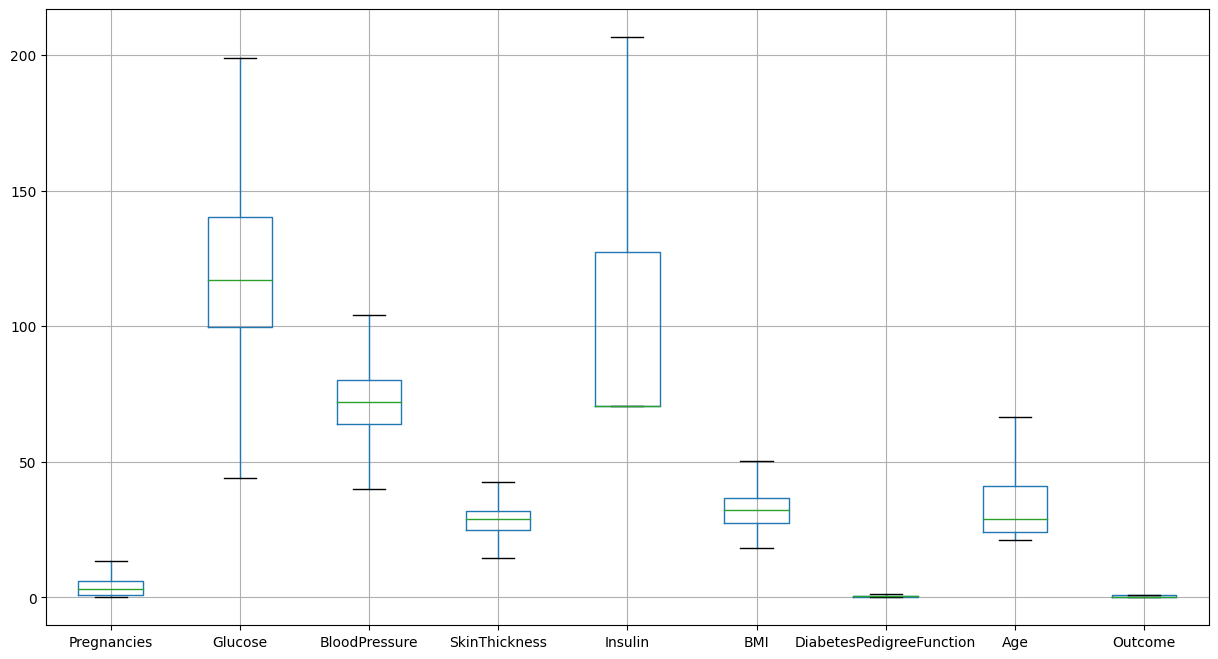

In [ ]:
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'],figsize=(15,8))

In [ ]:
df['Outcome'].unique()

array([1, 0])

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: ylabel='count'>

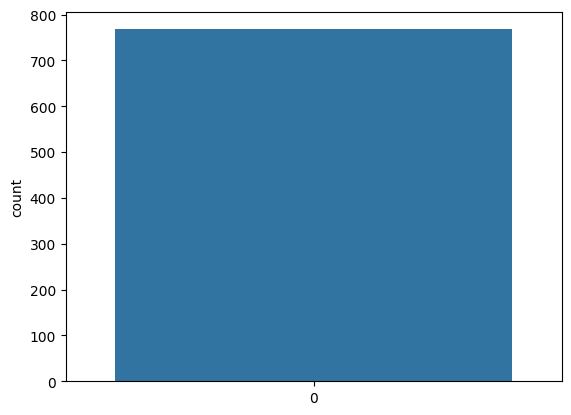

In [ ]:
sns.countplot(df['Outcome'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df.drop(['Outcome'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.328317,Pregnancies
1,21.372358,Glucose
2,33.614206,BloodPressure
3,23.541240,SkinThickness
4,6.575937,Insulin
5,38.025317,BMI
6,3.749146,DiabetesPedigreeFunction
7,14.849523,Age


In [ ]:
X= df.drop(['Outcome'],axis=1)
y= df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
from imblearn.combine import SMOTEENN
smote=SMOTEENN()
X_res,y_res = smote.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res, test_size=0.2, random_state=42)
from collections import Counter
print("Before SMOTE: ",Counter(y_train))
print("After SMOTE: ",Counter(y_train))

Before SMOTE:  Counter({1: 253, 0: 195})
After SMOTE:  Counter({1: 253, 0: 195})


In [ ]:
#from imblearn.over_sampling import SMOTE

In [ ]:
#X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
#y_res.value_counts()

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [ ]:
X_train

array([[-0.51011492,  0.54444416, -0.45793298, ..., -0.52121049,
        -0.69655684, -0.4061605 ],
       [-0.55392265,  1.25978518, -0.84466983, ...,  0.34434676,
         0.05499611, -0.4890954 ],
       [-0.97108922, -1.22067348, -0.58545905, ..., -0.84494863,
        -0.47868293, -0.21537246],
       ...,
       [-0.36512514,  1.24676022, -0.0360589 , ...,  0.16104928,
        -1.00638847, -0.8831306 ],
       [ 0.21409517, -0.33378222,  0.13090957, ..., -0.0341613 ,
         0.50705623,  0.25882678],
       [-0.0621431 ,  0.04173446, -1.13485921, ..., -0.70981458,
         0.13234453, -0.21537246]])

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,70.43,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.43,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,70.43,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.00,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.00,43.1,1.200,33.0,1


In [ ]:
#from sklearn.decomposition import PCA

In [ ]:
#pca = PCA(n_components=0.87)

In [ ]:
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [ ]:
#pca.explained_variance_ratio_

In [ ]:
#sum(pca.explained_variance_ratio_)

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC(gamma='auto', probability=True)

In [ ]:
svm.fit(X_train,y_train)

SVC(gamma='auto', probability=True)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9017857142857143

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.91      0.89      0.90        54

    accuracy                           0.90       112
   macro avg       0.90      0.90      0.90       112
weighted avg       0.90      0.90      0.90       112



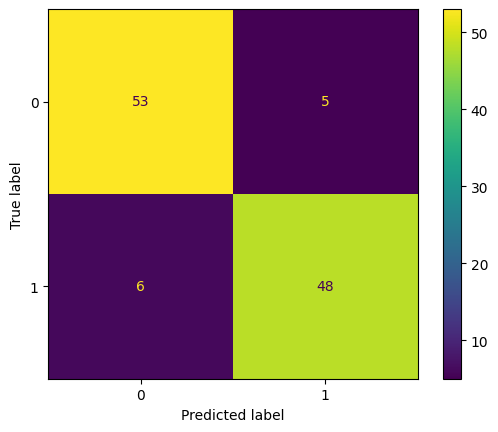

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=4219)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=4219)

In [ ]:
y_pred2 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.9464285714285714

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.93      0.96      0.95        54

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



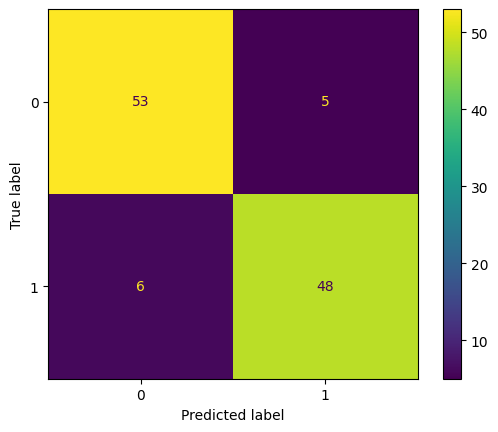

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
df=pd.DataFrame()
df['y_test']=y_test
df['y_pred']=y_pred2
df

,y_test,y_pred
453,1,1
341,1,1
177,0,0
86,0,0
332,1,1
...,...,...
88,0,0
235,0,0
352,1,1
33,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.9375

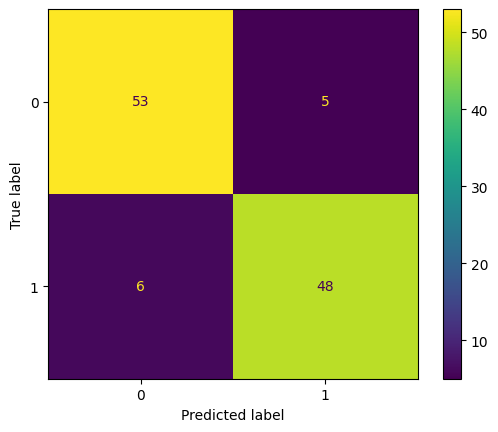

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred4 = gbc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.9375

In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        58
           1       0.91      0.96      0.94        54

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



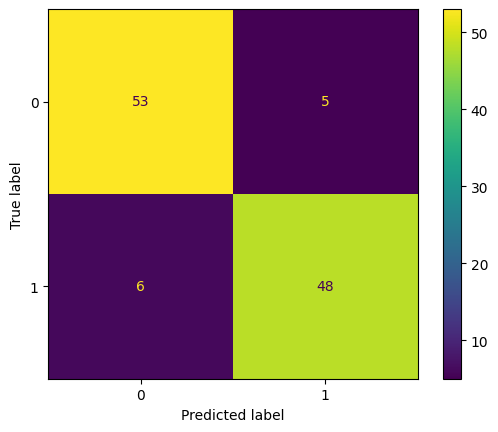

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred5 = nb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.9017857142857143

In [ ]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        58
           1       0.86      0.94      0.90        54

    accuracy                           0.90       112
   macro avg       0.90      0.90      0.90       112
weighted avg       0.91      0.90      0.90       112



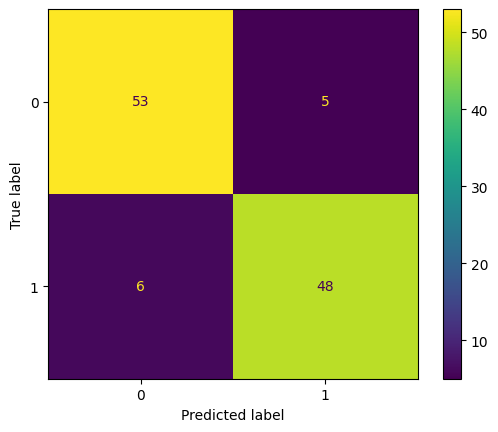

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log= LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred6 = log.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred6)

0.9017857142857143

In [ ]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        58
           1       0.88      0.93      0.90        54

    accuracy                           0.90       112
   macro avg       0.90      0.90      0.90       112
weighted avg       0.90      0.90      0.90       112



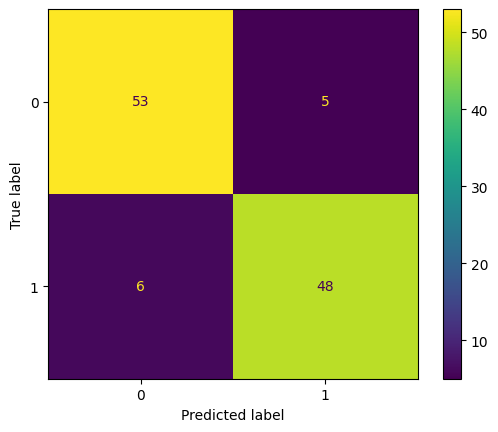

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.8 MB/s eta 0:00:00


In [ ]:
from sklearn import metrics
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

Learning rate set to 0.007312
0:	learn: 0.6825547	total: 51.5ms	remaining: 51.5s
1:	learn: 0.6741499	total: 55.6ms	remaining: 27.7s
2:	learn: 0.6650584	total: 60.9ms	remaining: 20.2s
3:	learn: 0.6549143	total: 67.9ms	remaining: 16.9s
4:	learn: 0.6470319	total: 77.9ms	remaining: 15.5s
5:	learn: 0.6371997	total: 83.6ms	remaining: 13.8s
6:	learn: 0.6279171	total: 91.2ms	remaining: 12.9s
7:	learn: 0.6187916	total: 100ms	remaining: 12.4s
8:	learn: 0.6097221	total: 106ms	remaining: 11.7s
9:	learn: 0.6001616	total: 114ms	remaining: 11.3s
10:	learn: 0.5931376	total: 119ms	remaining: 10.7s
11:	learn: 0.5857769	total: 124ms	remaining: 10.2s
12:	learn: 0.5788491	total: 126ms	remaining: 9.58s
13:	learn: 0.5703114	total: 129ms	remaining: 9.11s
14:	learn: 0.5621903	total: 134ms	remaining: 8.82s
15:	learn: 0.5540309	total: 138ms	remaining: 8.5s
16:	learn: 0.5466547	total: 144ms	remaining: 8.31s
17:	learn: 0.5395857	total: 147ms	remaining: 8.03s
18:	learn: 0.5340368	total: 150ms	remaining: 7.77s
19:	l

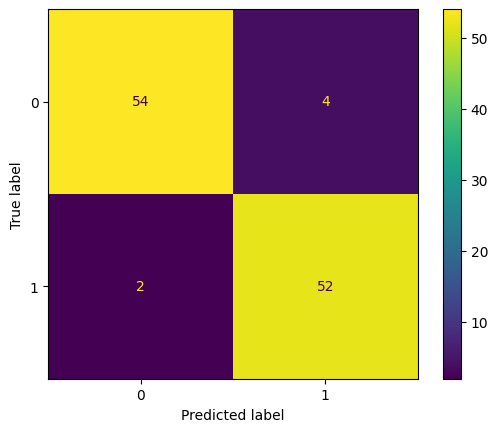

In [ ]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)


0.9629629629629629

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)


0.9285714285714286

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9454545454545454

In [ ]:
import lightgbm as lgb
model1 = lgb.LGBMClassifier()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
y_pred_train = model1.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

[LightGBM] [Info] Number of positive: 253, number of negative: 195
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.564732 -> initscore=0.260390
[LightGBM] [Info] Start training from score 0.260390
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

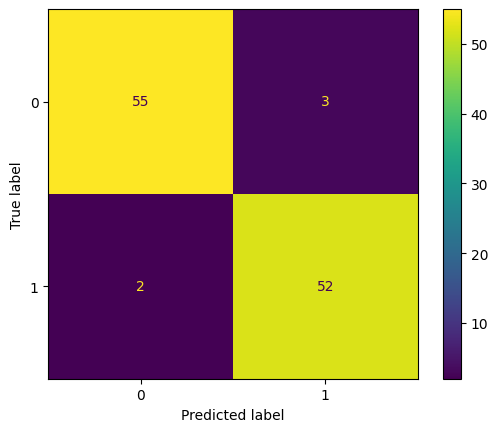

In [ ]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.93      0.96      0.95        54

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112

Testing accuracy: 0.9464285714285714


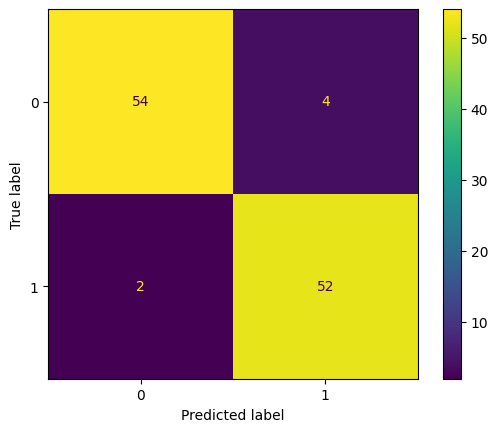

In [ ]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=10)
folds.get_n_splits(X)
def get_score(model):
  for train_index, test_index in folds.split(X):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

In [ ]:
#final_data = pd.DataFrame({'Models': ['RFC','ADB','LGB','DT','CB'], 'Accuracy' : [get_score(RandomForestClassifier(random_state=4219))*100,get_score(AdaBoostClassifier())*100,get_score(lgb.LGBMClassifier())*100,get_score(DecisionTreeClassifier())*100,get_score(CatBoostClassifier())*100]})
final_data = pd.DataFrame({'Models': ['RFC','LGB','CB','ADB'], 'Accuracy' : [get_score(RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_features='log2',max_depth=15,bootstrap=False))*100,get_score(lgb.LGBMClassifier())*100,get_score(CatBoostClassifier())*100,get_score(AdaBoostClassifier())*100]})

[LightGBM] [Info] Number of positive: 253, number of negative: 195
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.564732 -> initscore=0.260390
[LightGBM] [Info] Start training from score 0.260390
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
final_data

,Models,Accuracy
0,RFC,93.750000
1,LGB,95.535714
2,CB,94.642857
3,ADB,94.642857


<Axes: xlabel='Models', ylabel='Accuracy'>

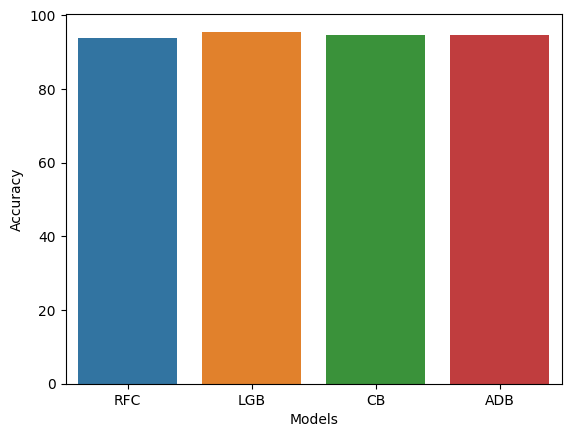

In [ ]:
sns.barplot(x = final_data['Models'],y = final_data['Accuracy'])

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(model1, open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('diabetes_model.sav','rb'))